In [10]:
from superflexpy.implementation.elements.hbv import PowerReservoir
from superflexpy.implementation.elements.gr4j import UnitHydrograph1
from superflexpy.implementation.root_finders.pegasus import PegasusPython
from superflexpy.implementation.numerical_approximators.implicit_euler import ImplicitEulerPython
from superflexpy.framework.unit import Unit
from superflexpy.framework.node import Node
from superflexpy.framework.network import Network

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# here we select a solver and an approximator for the superFlex model. 
solver_python = PegasusPython()
approximator = ImplicitEulerPython(root_finder=solver_python)

In [84]:
# A first instance of a reservoir is created. 

reservoir = PowerReservoir(
    parameters={'k': 0.01, 'alpha': 2.0},
    states={'S0': 10.0},
    approximation=approximator,
    id='R'
)

#First lag function of the model

lag_function = UnitHydrograph1(
    parameters={'lag-time': 2.5},
    states={'lag': None},
    id='lag-fun'
)

In [85]:
unit_1 = Unit(
    layers=[[reservoir], [lag_function]],
    id='unit-1'
)

In [2]:
# We create a precipitation time series of 200 time steps and predict the output of the reservoir

#reproducibility 
np.random.seed(42)

# Generate a synthetic dataset of 200 precipitation values
precipitation = np.random.normal(loc=2.5, scale=5, size=200)
precipitation[precipitation < 0] = 0  # Ensure values are non-negative

evaporation = np.random.normal(loc=5, scale=2, size=200) #Slightly smaller values for evaporation
evaporation[evaporation < 0] = 0  # Ensure values are non-negative

# Round values to two decimal places
evaporation = np.round(evaporation, 1)
precipitation = np.round(precipitation, 1)

unit_1.set_timestep(1.0)
unit_1.set_input([precipitation],[evaporation])
output = unit_1.get_output()[0]

NameError: name 'np' is not defined

In [97]:
#reservoir_state = unit_1.state_array[:, 0]
r_state = unit_1.get_internal(id='R', attribute='state_array')[:, 0]
r_output = unit_1.call_internal(id='R', method='get_output', solve=False)[0]


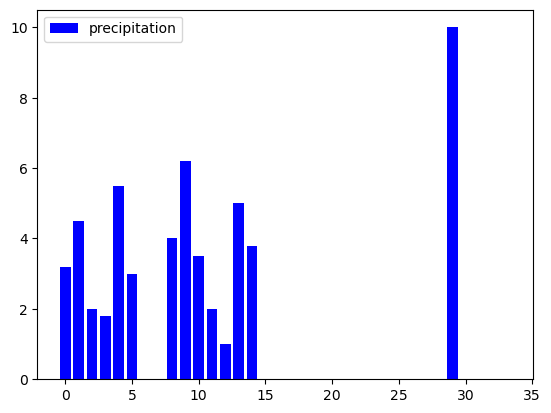

In [98]:
plt.bar(range(len(precipitation)), precipitation, color = 'blue', label = 'precipitation')

plt.legend()
plt.show()

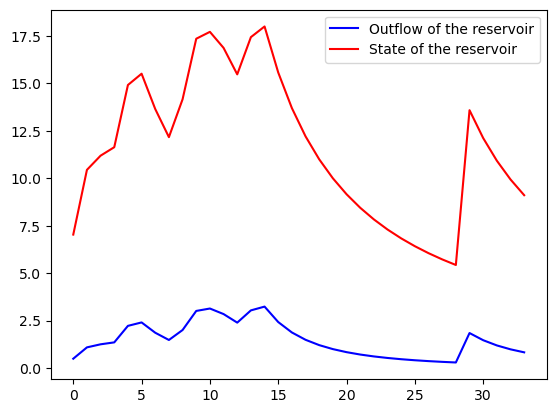

In [99]:
plt.plot(range(len(precipitation)), r_output, color = 'blue', label = 'Outflow of the reservoir')
plt.plot(range(len(precipitation)), r_state, color = 'red', label = 'State of the reservoir')

plt.legend()
plt.show()

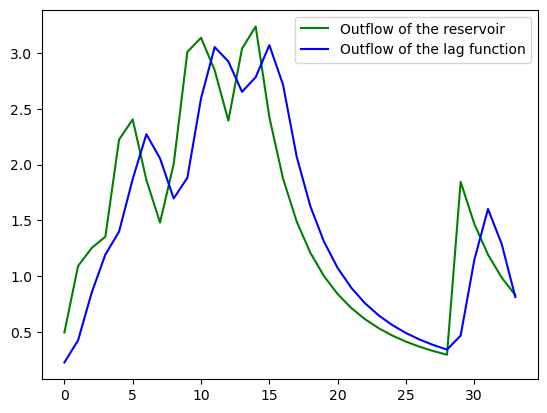

In [100]:
plt.plot(range(len(precipitation)), r_output, color = 'green', label = 'Outflow of the reservoir')
plt.plot(range(len(precipitation)), output, color = 'blue', label = 'Outflow of the lag function')


plt.legend()
plt.show()

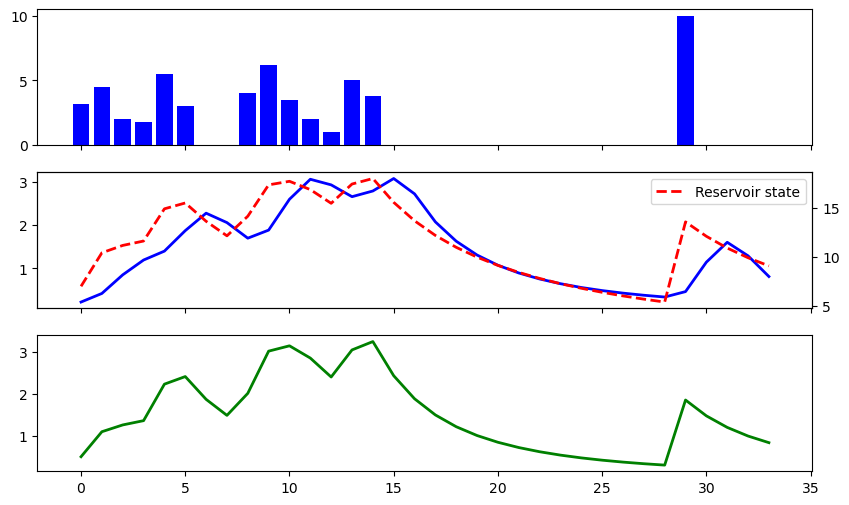

In [105]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 6))
ax[0].bar(x=range(len(precipitation)), height=precipitation, color='blue', label = 'precipitation')


ax[1].plot(range(len(precipitation)), output, color='blue', lw=2, label='Outflow')
ax_bis = ax[1].twinx()
ax_bis.plot(range(len(precipitation)), r_state, color='red', lw=2, ls='--', label='Reservoir state')


ax[2].plot(range(len(precipitation)), r_output, color='green', lw=2, label='Reservoir state')

plt.legend()
#ax_bis.plot(range(len(precipitation)), r_output, color='yellow', lw=2, ls='--', label='Reservoir state')